In [1]:
import numpy as np 
import pandas as pd

In [6]:
df = pd.read_csv('User_Data.csv')

In [7]:
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [15]:
# extract the independent and dependent variable
x = df.iloc[:,[2,3]].values

In [18]:
x[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [21]:
y = df.iloc[:,4].values

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [24]:
# feature scaling 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

log_classifier = LogisticRegression()
log_classifier.fit(x_train, y_train)
y_pred = log_classifier.predict(x_test)

In [25]:
x_train[:10]

array([[-0.80276277,  0.44295604],
       [-0.70800656,  1.43671337],
       [-0.23422551, -0.5508013 ],
       [ 0.90284902,  1.16568865],
       [-1.0870314 ,  0.4730699 ],
       [-0.89751898, -1.09285075],
       [-0.51849414,  0.95489164],
       [ 1.47138628,  0.41284218],
       [-1.46605624,  0.38272832],
       [-1.75032487, -1.48433091]])

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('accuracy:', accuracy_score(y_test, y_pred)*100)

accuracy: 86.25


In [31]:
cm =(confusion_matrix(y_test, y_pred))

In [32]:
cm

array([[43,  2],
       [ 9, 26]])

In [96]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [97]:
print('accuracy:', accuracy_score(y_test, y_pred)*100)

accuracy: 92.5


In [86]:
cm1 = confusion_matrix(y_test, y_pred)

In [87]:
cm1

array([[43,  2],
       [ 4, 31]])

In [88]:
err =[]

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i=knn.predict(x_test)
    err.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'mean err')

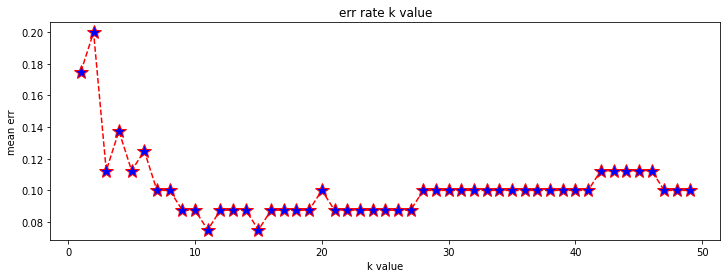

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(range(1,50), err, color='red', linestyle='dashed', marker='*', 
markerfacecolor='blue', markersize=15)

plt.title("err rate k value")
plt.xlabel("k value")
plt.ylabel("mean err")